In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold

In [2]:
import os
os.chdir(r'd:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\recontrucao_da_estatistica_pesqueira_brasileira')
print(os.getcwd())

d:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\recontrucao_da_estatistica_pesqueira_brasileira


In [3]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_21488\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [4]:
df.head()

,Ano,Lula_art,Lula_ind,Lula_art_ind,Lula_oceanica_art,Calamar_ind,Polvo_art,Polvo_ind,Polvo_art_ind,Polvo_cabecinha_art,...,Mexilhao_ind,Mexilhao_mangue_art,Caramujo_art,Caramujo_ind,Vieira_ind,Berbigao_art,Vongole_art,Outros_moluscos,TOTAL_MOLLUSCS,TOTAL_GROUPS_F&M
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28137.0
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27432.0
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26648.0
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24552.0
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22755.0


In [5]:
x0 = df[['Ano', 'TOTAL_MOLLUSCS']].dropna().values

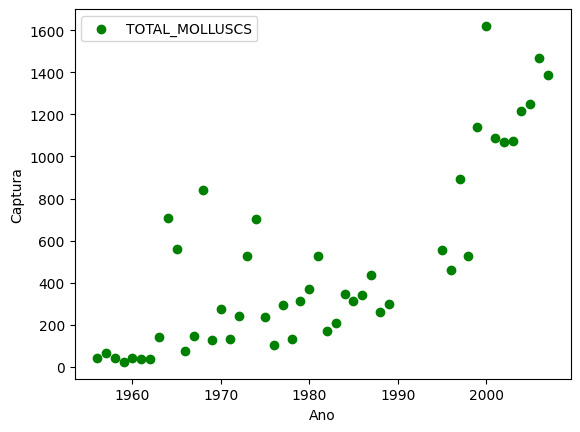

In [6]:
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='TOTAL_MOLLUSCS')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [7]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'TOTAL_MOLLUSCS'])

In [8]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['TOTAL_MOLLUSCS'], dtype= np.float32).reshape(-1, 1)
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [9]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}")

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 50: loss = 0.18626567721366882
Epoch 100: loss = 0.1719745397567749
Epoch 150: loss = 0.16375473141670227
Epoch 200: loss = 0.15410348773002625
Epoch 250: loss = 0.14977219700813293
Epoch 300: loss = 0.14883092045783997
Epoch 350: loss = 0.14967280626296997
Epoch 400: loss = 0.14686372876167297
Epoch 450: loss = 0.1461082398891449
Epoch 500: loss = 0.14184918999671936
Epoch 550: loss = 0.1384790688753128
Epoch 600: loss = 0.14256568253040314
Epoch 650: loss = 0.12866558134555817
Epoch 700: loss = 0.13869468867778778
Epoch 750: loss = 0.14660491049289703
Epoch 800: loss = 0.11258731037378311
Epoch 850: loss = 0.12376074492931366
Epoch 900: loss = 0.10173102468252182
Epoch 950: loss = 0.10311224311590195
Epoch 1000: loss = 0.09521221369504929
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


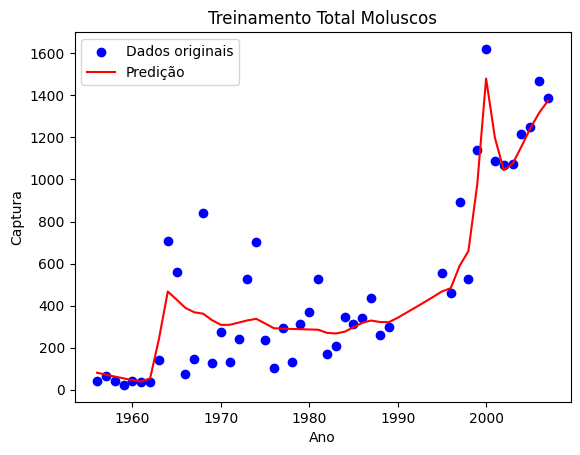

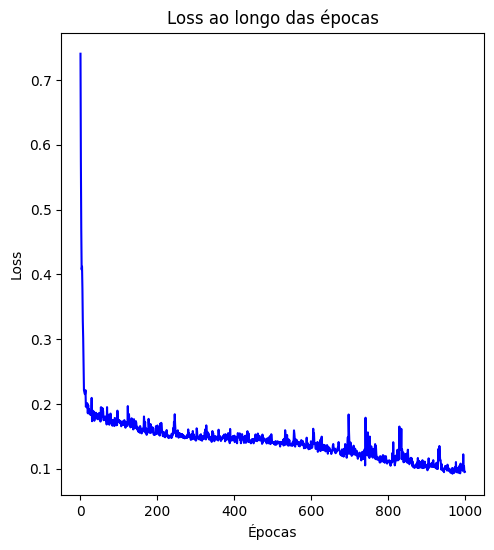

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=50) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=200, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
model.save_weights('pesos/.weights.h5', overwrite=True)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Total Moluscos')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predição para o ano 1950: 139.2855224609375
Predição para o ano 1951: 133.42739868164062
Predição para o ano 1952: 127.59878540039062
Predição para o ano 1953: 117.35122680664062
Predição para o ano 1954: 106.79403686523438
Predição para o ano 1955: 93.06124877929688
Predição para o ano 1990: 342.3902893066406
Predição para o ano 1991: 366.8025817871094
Predição para o ano 1992: 391.14508056640625
Predição para o ano 1993: 415.9763488769531
Predição para o ano 1994: 441.3667907714844
Predição para o ano 2008: 1433.693603515625
Predição para o ano 2009: 1503.9775390625
Predição para o ano 2010: 1596.976318359375
Predição para o ano 2011: 1687.55517578125
Predição para o ano 2012: 1781.550048828125
Predição para o ano 2013: 1885.03076171875
Predição para o ano 2014: 1988.1904296875
Predição para o ano 2015: 2091.350830078125
Predição para o ano 2016: 2195.066650390625
Predição para o ano 2017: 2305.967529296875
Predição para o ano 2018: 2421.87377929

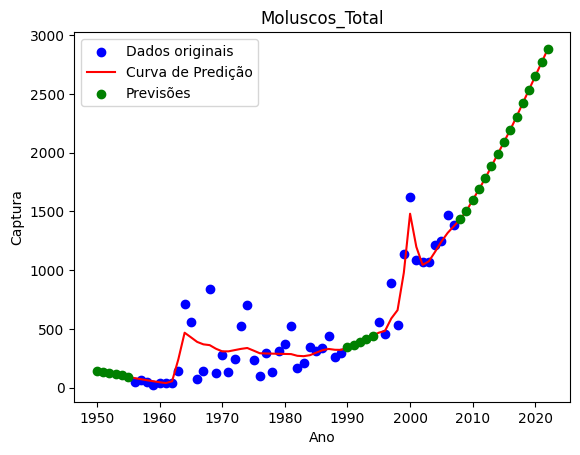

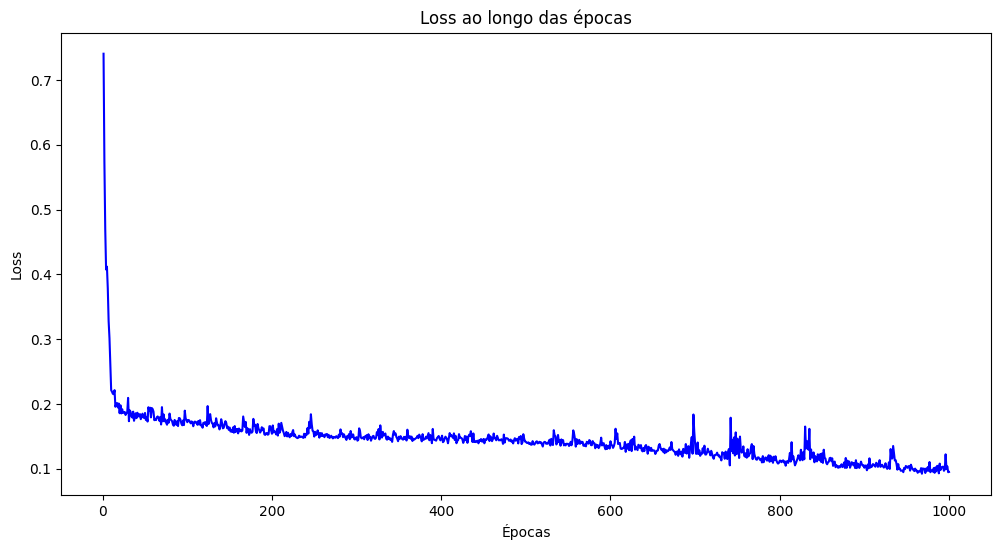

In [12]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1990, 1991, 1992, 1993, 1994, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.maximum(predicoes, 0)
for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Moluscos_Total')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [13]:
import pandas as pd
import numpy as np

df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Total_Moluscos_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN        139.285522
1   1951.0               NaN        133.427399
2   1952.0               NaN        127.598785
3   1953.0               NaN        117.351227
4   1954.0               NaN        106.794037
..     ...               ...               ...
68  2018.0               NaN       2421.873779
69  2019.0               NaN       2537.160400
70  2020.0               NaN       2652.330811
71  2021.0               NaN       2767.633301
72  2022.0               NaN       2882.952393

[73 rows x 3 columns]


In [14]:
df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Renan\AppData\Local\Temp\ipykernel_21488\203502866.py:1: SyntaxWarning: invalid escape sequence '\T'
  df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')


In [15]:
x0 = pd.DataFrame(df_0[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x1 = pd.DataFrame(df_0[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [16]:
resultado = x0['Captura Original'] + x1['Captura Preditos']

novo_df0 = pd.DataFrame({'Ano': df_0['Ano'], 'TOTAL_MOLLUSCS': resultado})

print(novo_df0)

     Ano  TOTAL_MOLLUSCS
0   1950      139.285522
1   1951      133.427399
2   1952      127.598785
3   1953      117.351227
4   1954      106.794037
..   ...             ...
68  2018     2421.873779
69  2019     2537.160400
70  2020     2652.330811
71  2021     2767.633301
72  2022     2882.952393

[73 rows x 2 columns]


Lula Artesanal (CURVA DE PROPORÇÕES))

In [17]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_21488\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [18]:
x0 = df[['Ano', 'Lula_art']].dropna().values
x1 = df[['Ano', 'Lula_ind']].dropna().values
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Lula_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Lula_ind'])

In [19]:
df_combinado = pd.merge(df_x0, novo_df0, on='Ano', how='inner')

In [20]:
print(df_combinado)

       Ano   Lula_art  TOTAL_MOLLUSCS
0   1978.0  106.00000      131.000000
1   1979.0  175.00000      314.000000
2   1980.0  335.00000      368.000000
3   1981.0  373.00000      527.000000
4   1982.0  127.00000      171.000000
5   1983.0  140.00000      206.000000
6   1984.0  209.00000      344.000000
7   1985.0  176.00000      313.000000
8   1986.0  114.00000      339.000000
9   1987.0  198.00000      436.000000
10  1988.0  112.00000      260.000000
11  1989.0  146.00000      297.000000
12  1995.0  389.50000      554.500000
13  1996.0   36.50000      460.000000
14  1997.0  104.00000      891.000000
15  1998.0   12.50000      529.000000
16  1999.0  127.50000     1140.500000
17  2000.0   14.00000     1621.000000
18  2001.0  184.50000     1086.500000
19  2002.0   88.50000     1071.000000
20  2003.0   86.50000     1072.500000
21  2004.0  101.00000     1218.000000
22  2005.0  106.50000     1249.000000
23  2006.0  122.50000     1469.500000
24  2007.0   72.50000     1387.500000
25  2008.0  

In [21]:
df_combinado['Proporção'] = df_combinado['Lula_art'] / df_combinado['TOTAL_MOLLUSCS']


curva_de_proporcao = df_combinado[['Ano', 'Proporção']]


print(curva_de_proporcao)

       Ano  Proporção
0   1978.0   0.809160
1   1979.0   0.557325
2   1980.0   0.910326
3   1981.0   0.707780
4   1982.0   0.742690
5   1983.0   0.679612
6   1984.0   0.607558
7   1985.0   0.562300
8   1986.0   0.336283
9   1987.0   0.454128
10  1988.0   0.430769
11  1989.0   0.491582
12  1995.0   0.702435
13  1996.0   0.079348
14  1997.0   0.116723
15  1998.0   0.023629
16  1999.0   0.111793
17  2000.0   0.008637
18  2001.0   0.169811
19  2002.0   0.082633
20  2003.0   0.080653
21  2004.0   0.082923
22  2005.0   0.085268
23  2006.0   0.083362
24  2007.0   0.052252
25  2008.0   0.012248
26  2009.0   0.022959
27  2010.0   0.006688
28  2011.0   0.012203
29  2012.0   0.004983
30  2013.0   0.005091
31  2014.0   0.105543
32  2015.0   0.001204
33  2017.0   0.024701
34  2018.0   0.013999
35  2019.0   0.016540
36  2020.0   0.011093
37  2021.0   0.020530
38  2022.0   0.022003


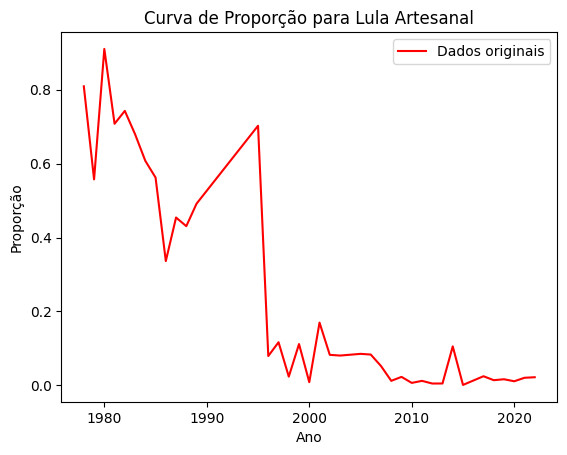

In [22]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Lula Artesanal')
plt.legend()
plt.show()

In [23]:
curva_de_proporcao.to_excel('curvas_de_propocao/Lula_art_prop.xlsx', index=False)

Lula Industrial (CURVA DE PROPORÇÕES)

In [24]:
df_combinado = pd.merge(df_x1, novo_df0, on='Ano', how='inner') 
print(df_combinado)



       Ano   Lula_ind  TOTAL_MOLLUSCS
0   1978.0   20.00000      131.000000
1   1979.0  129.00000      314.000000
2   1980.0   18.00000      368.000000
3   1981.0  115.00000      527.000000
4   1982.0   20.00000      171.000000
5   1983.0   12.00000      206.000000
6   1984.0   87.00000      344.000000
7   1985.0   23.00000      313.000000
8   1986.0   57.00000      339.000000
9   1987.0   30.00000      436.000000
10  1988.0    6.00000      260.000000
11  1989.0   21.00000      297.000000
12  1996.0  286.00000      460.000000
13  1997.0  488.50000      891.000000
14  1998.0  252.50000      529.000000
15  1999.0  345.50000     1140.500000
16  2000.0  637.50000     1621.000000
17  2001.0  214.00000     1086.500000
18  2002.0  387.50000     1071.000000
19  2003.0  389.50000     1072.500000
20  2004.0  444.00000     1218.000000
21  2005.0  451.50000     1249.000000
22  2006.0  507.50000     1469.500000
23  2007.0  572.50000     1387.500000
24  2008.0    2.16700     1433.693604
25  2009.0  

In [25]:
df_combinado['Proporção'] = df_combinado['Lula_ind'] / df_combinado['TOTAL_MOLLUSCS']

curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [26]:
curva_de_proporcao.to_excel('curvas_de_propocao/Lula_ind_prop.xlsx', index=False)

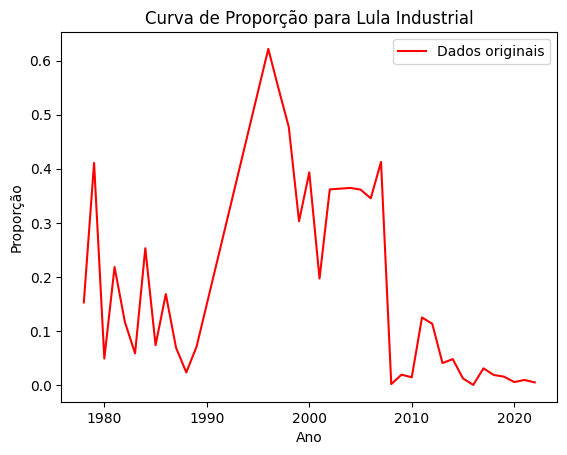

In [27]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Lula Industrial')
plt.legend()
plt.show()

Polvo artesanal (CURVA DE PROPORÇÕES)

In [28]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_21488\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [29]:
x0 = df[['Ano', 'Polvo_art']].dropna().values
x1 = df[['Ano', 'Polvo_ind']].dropna().values
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Polvo_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Polvo_ind'])

In [30]:
df_combinado = pd.merge(df_x0, novo_df0, on='Ano', how='inner')
print(df_combinado)

       Ano  Polvo_art  TOTAL_MOLLUSCS
0   1978.0    2.00000      131.000000
1   1979.0    8.00000      314.000000
2   1980.0   13.00000      368.000000
3   1981.0   14.00000      527.000000
4   1982.0    3.00000      171.000000
5   1983.0    1.00000      206.000000
6   1984.0    2.00000      344.000000
7   1985.0   12.00000      313.000000
8   1986.0    9.00000      339.000000
9   1987.0    8.00000      436.000000
10  1988.0    2.00000      260.000000
11  1989.0    6.00000      297.000000
12  1995.0  165.00000      554.500000
13  1996.0    2.00000      460.000000
14  1997.0   33.50000      891.000000
15  1998.0    5.50000      529.000000
16  1999.0   57.50000     1140.500000
17  2000.0   17.00000     1621.000000
18  2001.0   45.50000     1086.500000
19  2002.0   32.00000     1071.000000
20  2003.0   31.00000     1072.500000
21  2004.0   35.50000     1218.000000
22  2005.0   39.50000     1249.000000
23  2006.0   45.00000     1469.500000
24  2007.0   20.50000     1387.500000
25  2008.0  

In [31]:
df_combinado['Proporção'] = df_combinado['Polvo_art'] / df_combinado['TOTAL_MOLLUSCS']

curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [32]:
curva_de_proporcao.to_excel('curvas_de_propocao/Polvo_art_prop.xlsx', index=False)

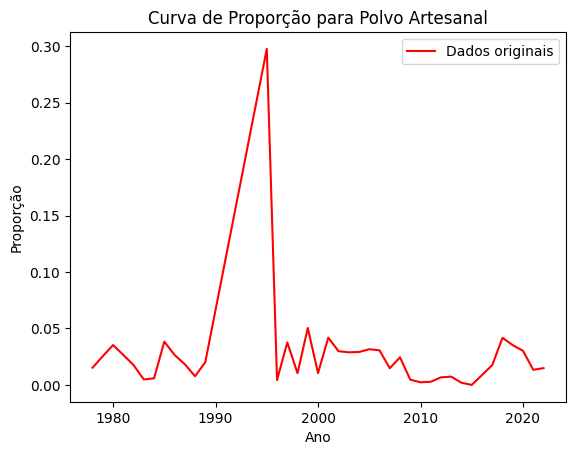

In [33]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Polvo Artesanal')
plt.legend()
plt.show()

In [34]:
df_combinado = pd.merge(df_x1, novo_df0, on='Ano', how='inner')


df_combinado['Proporção'] = df_combinado['Polvo_ind'] / df_combinado['TOTAL_MOLLUSCS']


curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [35]:
curva_de_proporcao.to_excel('curvas_de_propocao/Polvo_ind_prop.xlsx', index=False)

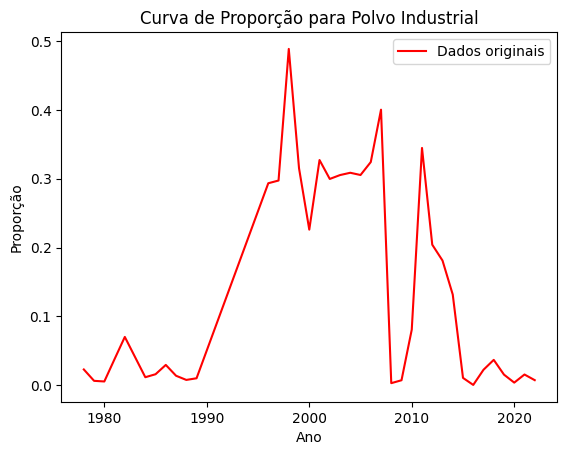

In [36]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Polvo Industrial')
plt.legend()
plt.show()

TREINAMENTO PARA AS CURVAS DE PROPORÇÕES

In [37]:
df = pd.read_excel('curvas_de_propocao/Lula_art_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.809160
1,1979,0.557325
2,1980,0.910326
3,1981,0.707780
4,1982,0.742690


In [38]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Proporção'])

df_x0= df_x0.drop_duplicates(subset= 'Proporção')


In [39]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Proporção'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [40]:
def leaky_relu(x):
    return tf.nn.RMSprop(x, alpha=0.01)

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.27746084332466125
Epoch 200: loss = 0.12812556326389313
Epoch 300: loss = 0.06396254897117615
Epoch 400: loss = 0.0571238175034523
Epoch 500: loss = 0.055451031774282455
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


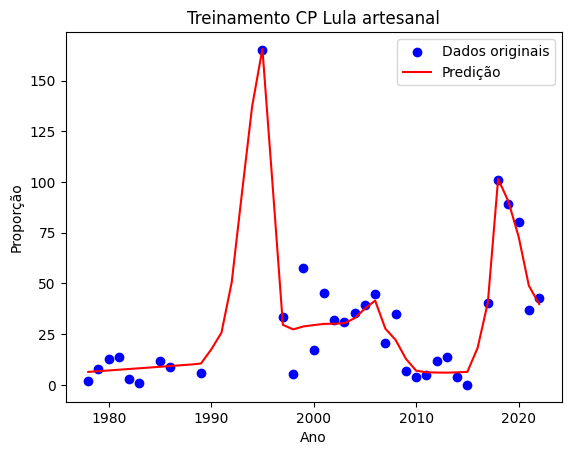

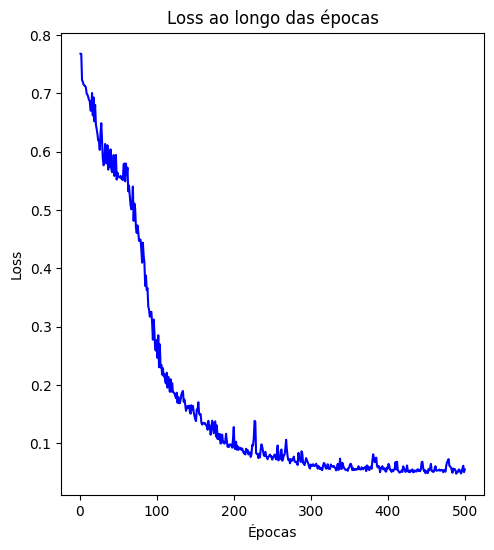

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=500, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Treinamento CP Lula artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predição para o ano 1950: -3.052705764770508
Predição para o ano 1951: -2.7238712310791016
Predição para o ano 1952: -2.394868850708008
Predição para o ano 1953: -2.0659847259521484
Predição para o ano 1954: -1.7370128631591797
Predição para o ano 1955: -1.4080810546875
Predição para o ano 1956: -1.0791358947753906
Predição para o ano 1957: -0.751983642578125
Predição para o ano 1958: -0.4264545440673828
Predição para o ano 1959: -0.10091018676757812
Predição para o ano 1960: 0.22457313537597656
Predição para o ano 1961: 0.5501060485839844
Predição para o ano 1962: 0.8756809234619141
Predição para o ano 1963: 1.2011642456054688
Predição para o ano 1964: 1.5267086029052734
Predição para o ano 1965: 1.8626327514648438
Predição para o ano 1966: 2.2072715759277344
Predição para o ano 1967: 2.5518798828125
Predição para o ano 1968: 2.896484375
Predição para o ano 1969: 3.2411022186279297
Predição para o ano 1970: 3.584871292114258
Predição para o ano 19

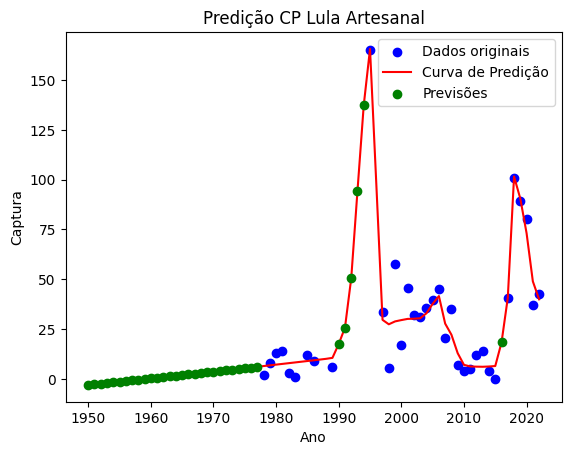

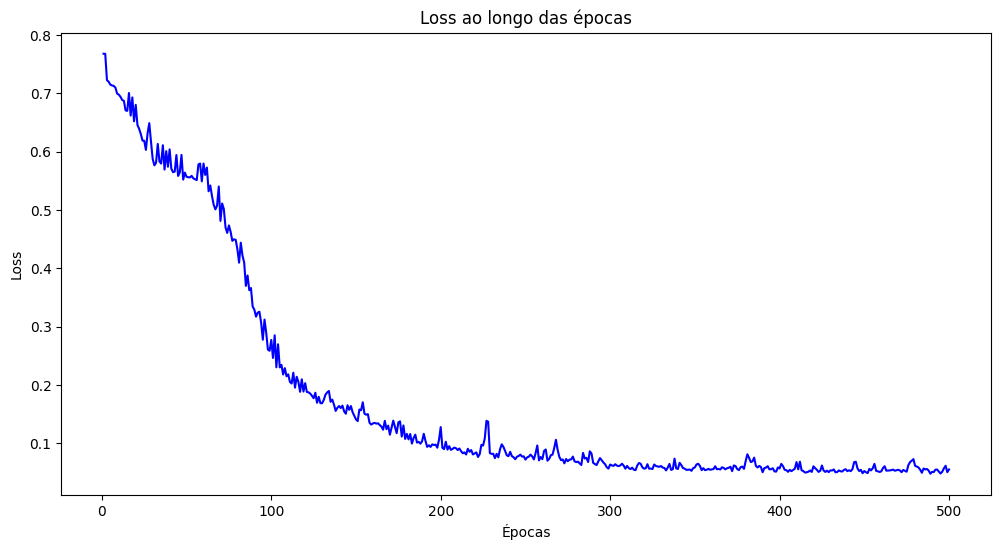

In [42]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)

anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std

predicoes_normalizadas = model.predict(anos_para_prever_normalizados)

predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição CP Lula Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [43]:

df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Lula_artesanal_reconstruido2.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN               0.0
1   1951.0               NaN               0.0
2   1952.0               NaN               0.0
3   1953.0               NaN               0.0
4   1954.0               NaN               0.0
..     ...               ...               ...
64  2018.0        101.038300               NaN
65  2019.0         89.392403               NaN
66  2020.0         80.210747               NaN
67  2021.0         37.115501               NaN
68  2022.0         42.802650               NaN

[69 rows x 3 columns]


Lula Industrial

In [44]:
df = pd.read_excel('curvas_de_propocao/Lula_ind_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.152672
1,1979,0.410828
2,1980,0.048913
3,1981,0.218216
4,1982,0.116959


In [45]:
df_x1= pd.DataFrame(x0, columns= ['Ano', 'Proporção'])

df_x1= df_x1.drop_duplicates(subset= 'Proporção')


In [46]:
x = np.array(df_x1['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x1['Proporção'], dtype=np.float32).reshape(-1, 1)

In [47]:
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.5736114382743835
Epoch 200: loss = 0.1624731421470642
Epoch 300: loss = 0.11035186052322388
Epoch 400: loss = 0.09614366292953491
Epoch 500: loss = 0.06585454940795898
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000014F330A2E80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


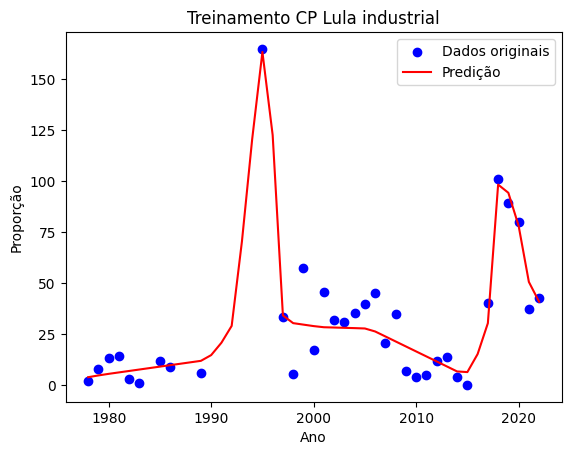

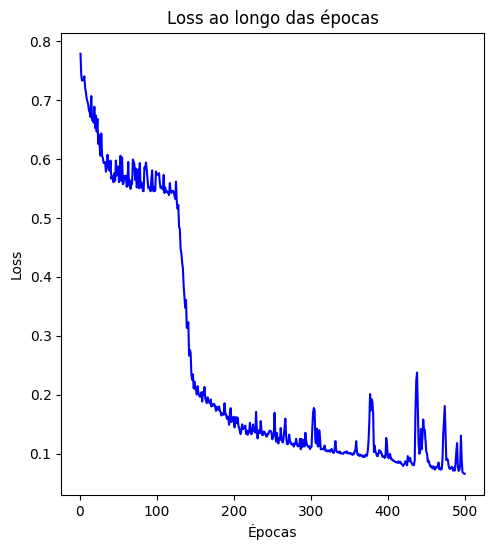

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=500, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Treinamento CP Lula industrial')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predição para o ano 1950: -20.5443058013916
Predição para o ano 1951: -19.6702823638916
Predição para o ano 1952: -18.796354293823242
Predição para o ano 1953: -17.922327041625977
Predição para o ano 1954: -17.052766799926758
Predição para o ano 1955: -16.18378257751465
Predição para o ano 1956: -15.314706802368164
Predição para o ano 1957: -14.445676803588867
Predição para o ano 1958: -13.57667350769043
Predição para o ano 1959: -12.707548141479492
Predição para o ano 1960: -11.838598251342773
Predição para o ano 1961: -10.969533920288086
Predição para o ano 1962: -10.100492477416992
Predição para o ano 1963: -9.231470108032227
Predição para o ano 1964: -8.362447738647461
Predição para o ano 1965: -7.493398666381836
Predição para o ano 1966: -6.624345779418945
Predição para o ano 1967: -5.755346298217773
Predição para o ano 1968: -4.88627815246582
Predição para o ano 1969: -4.017240524291992
Predição para o ano 1970: -3.148214340209961
Predição pa

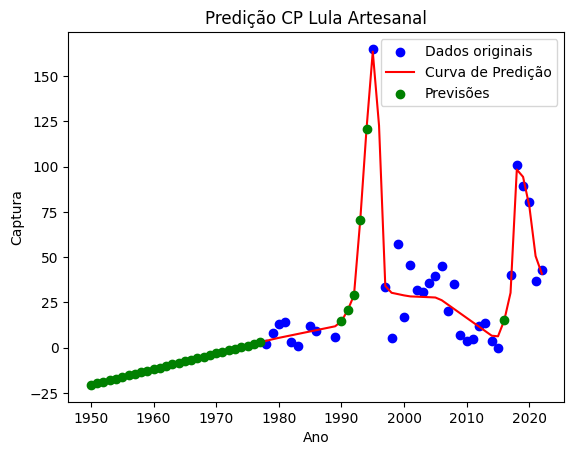

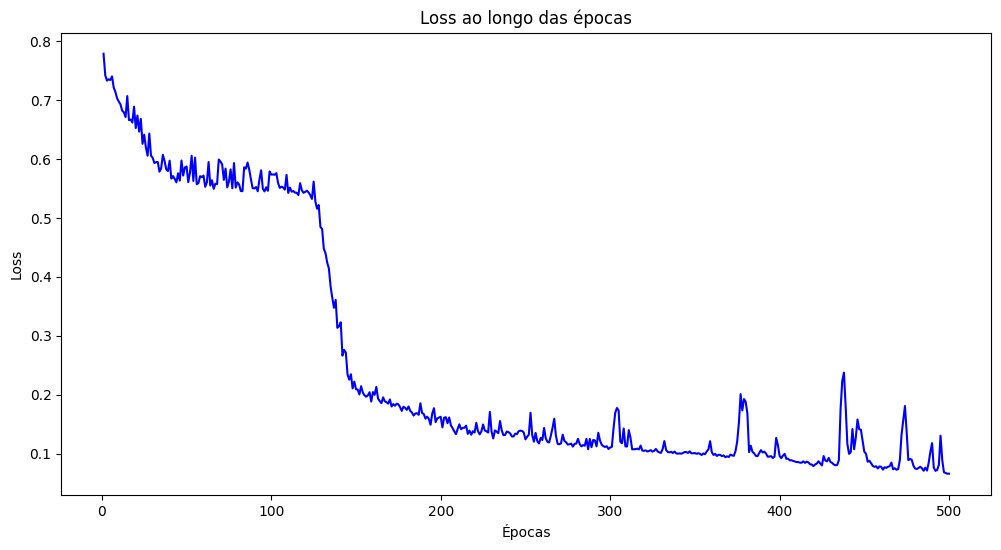

In [49]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)

anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std

predicoes_normalizadas = model.predict(anos_para_prever_normalizados)

predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição CP Lula Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

Polvo artesanal

In [51]:
df = pd.read_excel('curvas_de_propocao/Polvo_art_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.015267
1,1979,0.025478
2,1980,0.035326
3,1981,0.026565
4,1982,0.017544


In [52]:
df_x1= pd.DataFrame(x0, columns= ['Ano', 'Proporção'])
df_x1= df_x1.drop_duplicates(subset= 'Proporção')


In [53]:
x = np.array(df_x1['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x1['Proporção'], dtype=np.float32).reshape(-1, 1)

In [54]:
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.20987379550933838
Epoch 200: loss = 0.12476857006549835
Epoch 300: loss = 0.062404170632362366
Epoch 400: loss = 0.05503721162676811
Epoch 500: loss = 0.05653292313218117
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


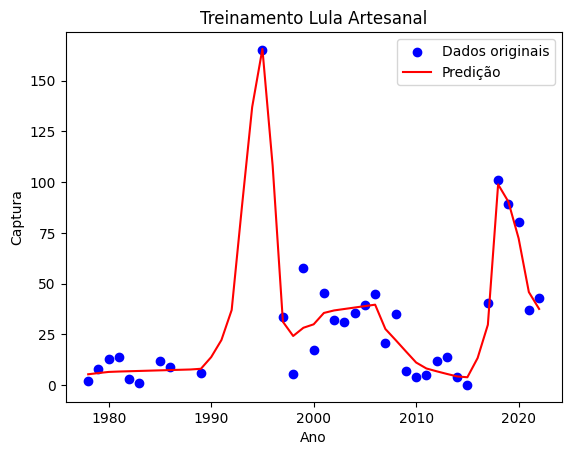

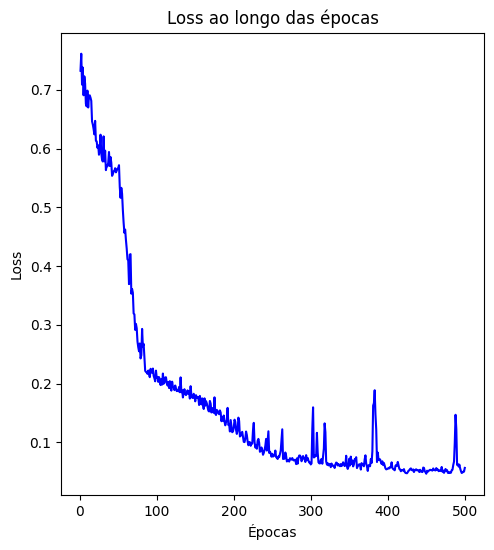

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=500, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Lula Artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()